In [1]:
# Import necessary packages
import os
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
# Define file path for storing raw data
file_path = "/Users/maxwellcozean/Desktop/ECON 1680/Machine Learning Project/Data"

# Define file path for storing figures
output_path = "/Users/maxwellcozean/Desktop/ECON 1680/Machine Learning Project/Output"

# Join paths and import csv as dataframe
df = pd.read_csv(os.path.join(file_path,"Most-Recent-Cohorts-Institution.csv"),encoding='utf-8',low_memory=False)

In [3]:
# Define a list of features
features = ['PREDDEG','CONTROL','LOCALE','ADM_RATE','SATVR75','SATMT75','UGDS',
            'UGDS_WHITE','UGDS_BLACK','UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI',
            'PPTUG_EF','COSTT4_A','COSTT4_P','INEXPFTE','AVGFACSAL','PCTPELL','C150_4',
            'RET_FT4','PCTFLOAN','CDR2','PAR_ED_PCT_PS','GRAD_DEBT_MDN','MD_FAMINC',
            'MD_EARN_WNE_P6','MD_EARN_WNE_P8']

# Keep only the features defined above
df = df.filter(features)

# Drop null values of CDR2 (outcome of interest)
df = df.dropna(subset=['CDR2']).reset_index(drop=True)

# Generate preliminary summary statistics
df.describe()

,PREDDEG,CONTROL,LOCALE,ADM_RATE,SATVR75,SATMT75,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,...,COSTT4_P,INEXPFTE,AVGFACSAL,PCTPELL,C150_4,RET_FT4,PCTFLOAN,CDR2,MD_EARN_WNE_P6,MD_EARN_WNE_P8
count,5529.000000,5529.000000,5089.000000,1799.000000,990.000000,990.000000,4865.000000,4865.000000,4865.000000,4865.000000,...,1506.000000,5081.000000,3582.000000,4839.000000,2105.000000,1923.000000,4839.000000,5529.000000,5136.000000,5142.000000
mean,1.891120,1.996744,20.110631,0.726349,638.138384,632.669697,2792.815211,0.468829,0.178625,0.193579,...,22982.539177,9510.144853,7651.807649,0.426939,0.526253,0.720767,0.435661,0.086753,35651.292835,38517.930766
std,1.086729,0.832144,9.723706,0.224987,64.513142,75.196722,6252.365744,0.266243,0.205779,0.213827,...,7455.420220,13914.681997,2666.197638,0.201937,0.211692,0.173518,0.267339,0.066887,13380.160664,14788.605426
min,0.000000,1.000000,-3.000000,0.000000,420.000000,320.000000,0.000000,0.000000,0.000000,0.000000,...,3714.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9040.000000,9518.000000
25%,1.000000,1.000000,12.000000,0.614850,593.500000,580.000000,161.000000,0.243200,0.043000,0.051900,...,18246.500000,4550.000000,5897.000000,0.274300,0.381500,0.653900,0.199850,0.036000,26707.000000,28346.000000
50%,2.000000,2.000000,21.000000,0.780100,630.000000,620.000000,731.000000,0.494600,0.099300,0.113400,...,22298.000000,7156.000000,7266.500000,0.398400,0.532700,0.742700,0.475500,0.078000,33455.500000,35882.500000
75%,3.000000,3.000000,23.000000,0.895850,680.000000,680.000000,2530.000000,0.686600,0.238000,0.258200,...,27061.000000,10764.000000,8986.250000,0.564600,0.674500,0.827250,0.643000,0.126000,42260.000000,45765.000000
max,4.000000,3.000000,43.000000,1.000000,780.000000,800.000000,138138.000000,1.000000,1.000000,1.000000,...,56025.000000,634215.000000,23915.000000,1.000000,1.000000,1.000000,1.000000,1.000000,147347.000000,134883.000000


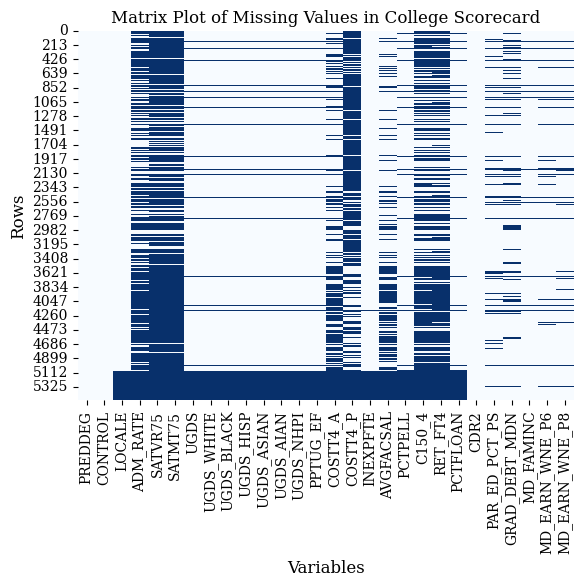

In [4]:
# Replace privacy suppressed values as null
df.replace('PS', np.nan, inplace=True)

# Set font to computer modern
plt.rcParams['font.family'] = 'serif'

# Generate new heatmap of missingness within dataset
sns.heatmap(df.isnull(), cmap='Blues', cbar=False)

# Add title to plot
plt.title('Matrix Plot of Missing Values in College Scorecard')

# Add x-axis label to plot
plt.xlabel('Variables',fontsize=12)

# Add y-axis label to plot
plt.ylabel('Rows',fontsize=12)

# Save figure in output path
plt.savefig(os.path.join(output_path,"missingness_matrix.png"))

# Show plot
plt.show()

In [5]:
# Define a list of variables to calculate the proportion missing (appear to have majority missing)
variables = ['ADM_RATE','SATVR75','SATMT75','COSTT4_A','COSTT4_P','AVGFACSAL','C150_4','RET_FT4']

# Loop through the list of variables
for variable in variables:
    
    # Calculate the number of missing observations
    missing_count = df[variable].isnull().sum()
    
    # Calculate the proportion of missing observations
    proportion_missing = missing_count / df.shape[0]
    
    # Print the proportion of missing observations
    print(f"The proportion of {variable} that is missing is: {proportion_missing}")
    
# Drop variables with > 40% missing observations
df = df.drop(columns=['ADM_RATE','SATVR75','SATMT75','C150_4','RET_FT4'])

# Drop rows >= 5000 (extensive missingness across variables)
df = df.drop(df.index[df.index >= 5000])

The proportion of ADM_RATE that is missing is: 0.6746247060951347
The proportion of SATVR75 that is missing is: 0.8209441128594682
The proportion of SATMT75 that is missing is: 0.8209441128594682
The proportion of COSTT4_A that is missing is: 0.44239464640983905
The proportion of COSTT4_P that is missing is: 0.7276180141074335
The proportion of AVGFACSAL that is missing is: 0.3521432447097124
The proportion of C150_4 that is missing is: 0.6192801591607886
The proportion of RET_FT4 that is missing is: 0.652197504069452


In [6]:
# Replace null values of COSTT4_A with 0 when COSTT4_P is not null
df.loc[df['COSTT4_A'].isnull() & df['COSTT4_P'].notnull(), 'COSTT4_A'] = 0

# Replace null values of COSTT4_P with 0 when COSTT4_A is not null
df.loc[df['COSTT4_P'].isnull() & df['COSTT4_A'].notnull(), 'COSTT4_P'] = 0

# Consolidate cost variables into a single measure
df['COST'] = df['COSTT4_A'] + df['COSTT4_P']

# Drop separate cost variables
df = df.drop(columns=['COSTT4_A','COSTT4_P'])

# Generate summary statistics for cost variable
df['COST'].describe()

count     4515.000000
mean     27674.661573
std      15763.688348
min       3714.000000
25%      16276.500000
50%      23314.000000
75%      33252.500000
max      86964.000000
Name: COST, dtype: float64

In [7]:
# Reorder columns
df = df[['PREDDEG','CONTROL','LOCALE','UGDS','UGDS_WHITE','UGDS_BLACK',
         'UGDS_HISP','UGDS_ASIAN','UGDS_AIAN','UGDS_NHPI','PPTUG_EF',
         'COST','INEXPFTE','AVGFACSAL','PCTPELL','PCTFLOAN','CDR2','PAR_ED_PCT_PS',
         'GRAD_DEBT_MDN','MD_FAMINC','MD_EARN_WNE_P6','MD_EARN_WNE_P8']]

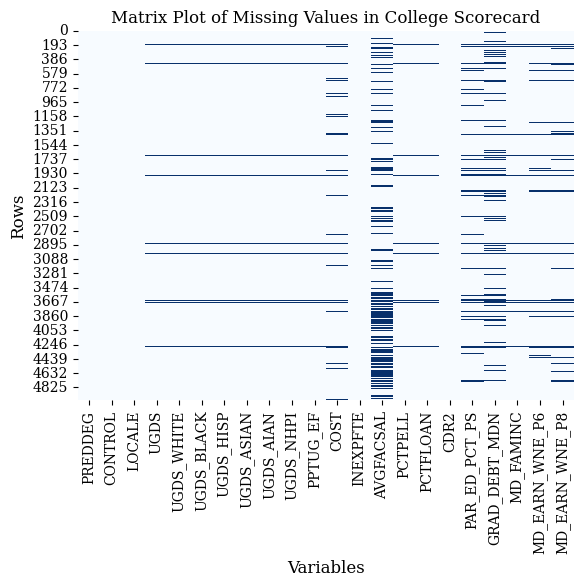

In [8]:
# Generate new heatmap of missingness within dataset
sns.heatmap(df.isnull(), cmap='Blues', cbar=False)

# Add title to plot
plt.title('Matrix Plot of Missing Values in College Scorecard')

# Add x-axis label to plot
plt.xlabel('Variables',fontsize=12)

# Add y-axis label to plot
plt.ylabel('Rows',fontsize=12)

# Save figure in output path
plt.savefig(os.path.join(output_path,"missingness_matrix_1.png"))

# Show plot
plt.show()

In [9]:
# Define imputer object with 100 iterations and random state 1680
imputer = IterativeImputer(max_iter=100, random_state=1680)

# Fit the imputer on the dataset and perform imputation
X_imputed = imputer.fit_transform(df)

# Transform imputed array back into a dataframe
df_imputed = pd.DataFrame(X_imputed,columns=df.columns)

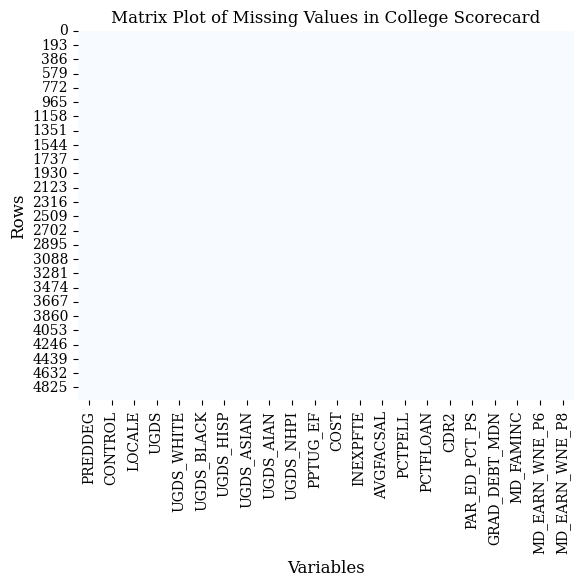

In [10]:
# Generate new heatmap of missingness within dataset
sns.heatmap(df_imputed.isnull(), cmap='Blues', cbar=False)

# Add title to plot
plt.title('Matrix Plot of Missing Values in College Scorecard')

# Add x-axis label to plot
plt.xlabel('Variables',fontsize=12)

# Add y-axis label to plot
plt.ylabel('Rows',fontsize=12)

# Save figure in output path
plt.savefig(os.path.join(output_path,"missingness_matrix_2.png"))

# Show plot
plt.show()

In [11]:
# Save cleaned data
df_imputed.to_csv(os.path.join(file_path,'Most-Recent-Cohorts-Institution_cleaned.csv'),index=False)